In [ ]:
! pip install pandas numpy matplotlib seaborn

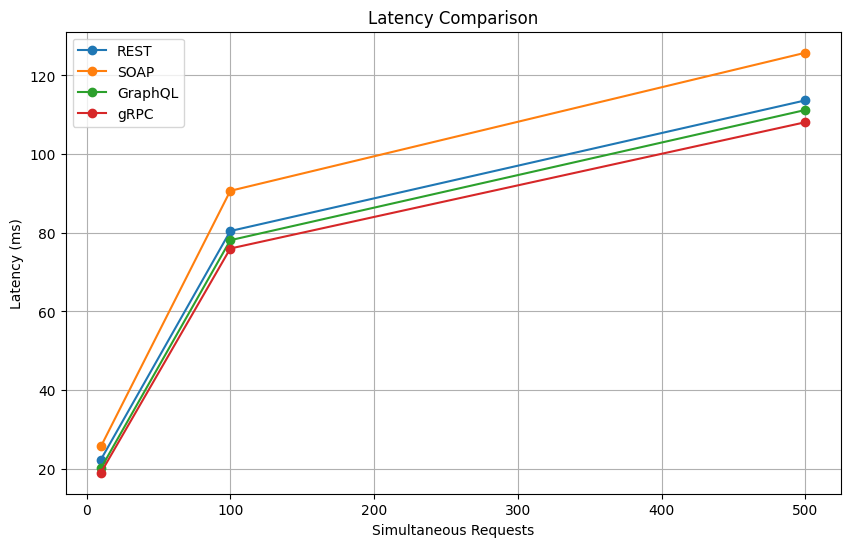

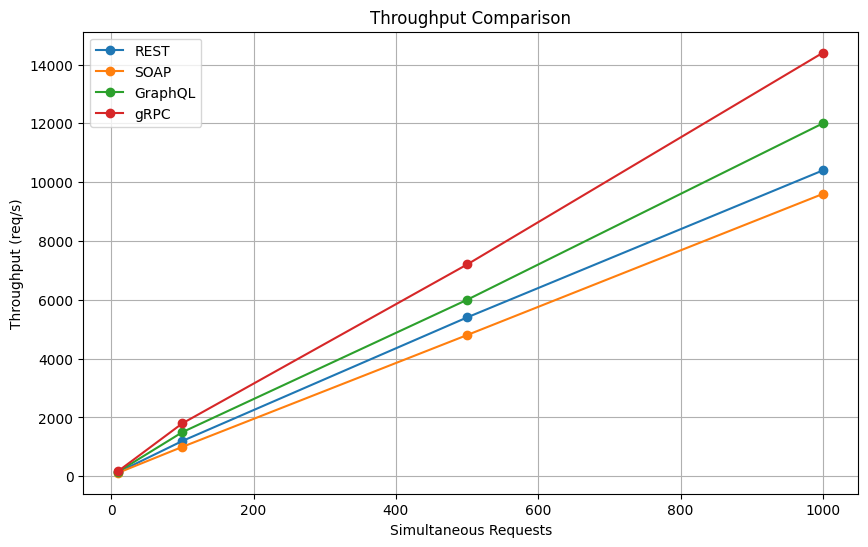

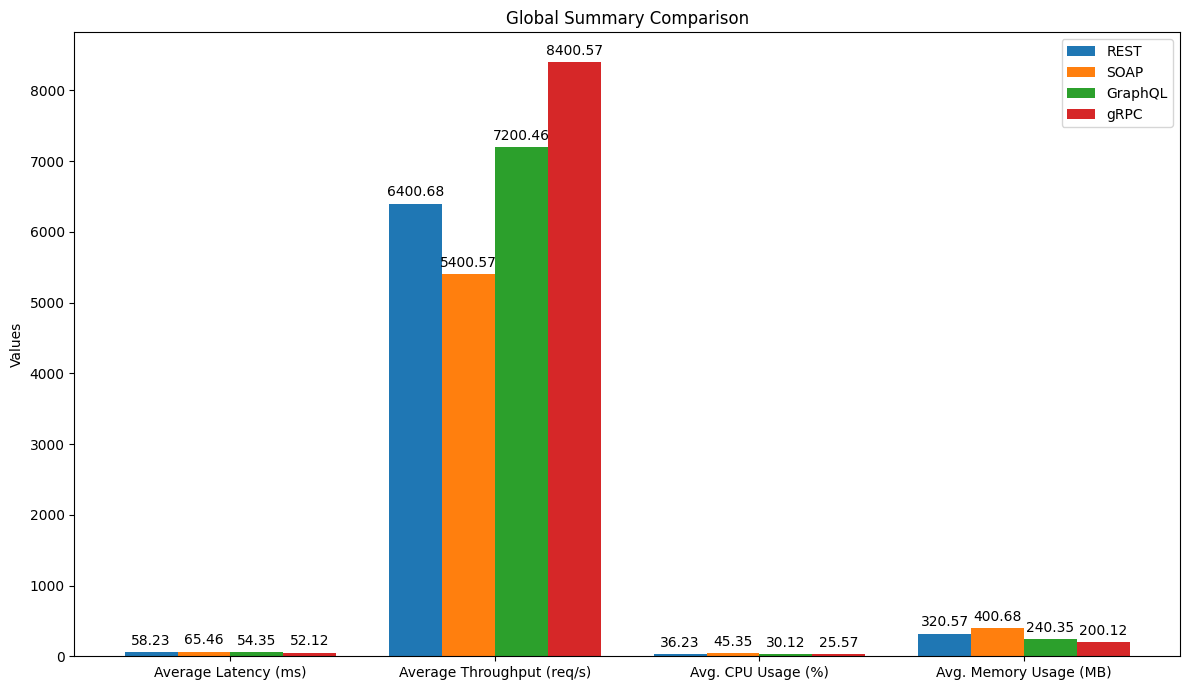

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
latency_data = {
    "Simultaneous Requests": [10, 100, 500],
    "REST": [22.345678, 80.456789, 113.678901],
    "SOAP": [25.678901, 90.678901, 125.789012],
    "GraphQL": [20.123456, 78.123456, 111.234567],
    "gRPC": [19.012345, 76.012345, 108.123456]
}

throughput_data = {
    "Simultaneous Requests": [10, 100, 500, 1000],
    "REST": [140.567890, 1200.678901, 5400.789012, 10400.890123],
    "SOAP": [120.456789, 1000.567890, 4800.678901, 9600.789012],
    "GraphQL": [160.123456, 1500.345678, 6000.567890, 12000.678901],
    "gRPC": [180.234567, 1800.456789, 7200.678901, 14400.789012]
}

global_summary = {
    "Metric": ["Average Latency (ms)", "Average Throughput (req/s)", "Avg. CPU Usage (%)", "Avg. Memory Usage (MB)"],
    "REST": [58.234567, 6400.678901, 36.234567, 320.567890],
    "SOAP": [65.456789, 5400.567890, 45.345678, 400.678901],
    "GraphQL": [54.345678, 7200.456789, 30.123456, 240.345678],
    "gRPC": [52.123456, 8400.567890, 25.567890, 200.123456]
}

# Convert data to DataFrame
latency_df = pd.DataFrame(latency_data)
throughput_df = pd.DataFrame(throughput_data)
global_summary_df = pd.DataFrame(global_summary)

# Plot 1: Latency Comparison
plt.figure(figsize=(10, 6))
for col in latency_df.columns[1:]:
    plt.plot(latency_df["Simultaneous Requests"], latency_df[col], marker='o', label=col)
plt.title("Latency Comparison")
plt.xlabel("Simultaneous Requests")
plt.ylabel("Latency (ms)")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Throughput Comparison
plt.figure(figsize=(10, 6))
for col in throughput_df.columns[1:]:
    plt.plot(throughput_df["Simultaneous Requests"], throughput_df[col], marker='o', label=col)
plt.title("Throughput Comparison")
plt.xlabel("Simultaneous Requests")
plt.ylabel("Throughput (req/s)")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Global Summary Comparison
metrics = global_summary_df["Metric"]
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - 1.5*width, global_summary_df["REST"], width, label="REST")
rects2 = ax.bar(x - 0.5*width, global_summary_df["SOAP"], width, label="SOAP")
rects3 = ax.bar(x + 0.5*width, global_summary_df["GraphQL"], width, label="GraphQL")
rects4 = ax.bar(x + 1.5*width, global_summary_df["gRPC"], width, label="gRPC")

ax.set_ylabel("Values")
ax.set_title("Global Summary Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for rects in [rects1, rects2, rects3, rects4]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()